<a href="https://colab.research.google.com/github/Dominic-Mu/PracticeRepo/blob/main/StudentData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Student Data Exploratory Data Analysis

##Reading the file into a pandas DataFrame

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# reading the data
df = pd.read_csv("/content/drive/MyDrive/Data/Practice/students_data.csv", index_col = 0)

## Previewing the Data

In [4]:
# previewing data
df.head()

,names,admission number,house,balance,english,kiswahili,mathematics,science,sst/cre,Creative Arts,music
0,"JERIEL NDEDA, OBURA",13259.0,NaN,NaN,81.0,39.0,50.0,30.0,59.0,99%,80%
1,"MUKUHA TIMOTHY, KAMAU",13243.0,NaN,NaN,85.0,74.0,68.0,49.0,78.0,38%,86%
2,"JOB, NGARA",13307.0,NaN,NaN,54.0,49.0,53.0,59.0,72.0,86%,62%
3,"CHEGE DAVID, KAMAU",13258.0,NaN,NaN,71.0,97.0,92.0,41.0,81.0,77%,80%
4,"RAMADHAN MUSA, TEPO",13363.0,NaN,NaN,40.0,84.0,74.0,82.0,89.0,64%,46%


In [5]:
df.sample(7)

,names,admission number,house,balance,english,kiswahili,mathematics,science,sst/cre,Creative Arts,music
95,"SWALEH, RAMAH",13384.0,NaN,NaN,60.0,89.0,52.0,29.0,77.0,80%,86%
26,"IAN KIPKORIR, LIMO",13351.0,NaN,"6,306",40.0,81.0,82.0,58.0,45.0,42%,65%
45,"ABDIRAHAMAN, ABDIHADI",13384.0,NaN,NaN,55.0,68.0,77.0,35.0,61.0,41%,80%
124,"Flora, Waithera",NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.0,49%,68%
114,"Anita Kahenya, Joy",13132.0,NaN,NaN,NaN,NaN,86.0,NaN,96.0,48%,69%
67,"KIRI JONATHAN, LOMOLE",13253.0,NaN,NaN,80.0,48.0,38.0,57.0,57.0,72%,70%
73,"LUCY, SHAKINA",13357.0,Elgon,NaN,49.0,85.0,46.0,51.0,81.0,78%,61%


In [6]:
df.shape

(147, 11)

In [7]:
df.columns

Index(['names', 'admission number', 'house', 'balance', 'english', 'kiswahili',
       'mathematics', 'science', 'sst/cre', 'Creative Arts', 'music'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 146
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   names             147 non-null    object 
 1   admission number  124 non-null    float64
 2   house             26 non-null     object 
 3   balance           58 non-null     object 
 4   english           121 non-null    float64
 5   kiswahili         119 non-null    float64
 6   mathematics       130 non-null    float64
 7   science           117 non-null    float64
 8   sst/cre           132 non-null    float64
 9   Creative Arts     143 non-null    object 
 10  music             147 non-null    object 
dtypes: float64(6), object(5)
memory usage: 13.8+ KB


In [9]:
df.describe()

,admission number,english,kiswahili,mathematics,science,sst/cre
count,1.240000e+02,121.000000,119.000000,130.000000,117.000000,132.000000
mean,1.473303e+05,70.958678,74.764706,72.938462,68.179487,70.833333
std,1.211743e+06,45.884710,74.971035,35.293180,60.666928,18.617142
min,8.700000e+01,-78.000000,29.000000,32.000000,28.000000,29.000000
25%,1.326200e+04,54.000000,49.500000,55.500000,46.000000,54.750000
50%,1.330650e+04,71.000000,66.000000,71.000000,66.000000,73.000000
75%,1.335625e+04,83.000000,82.500000,86.000000,79.000000,87.000000
max,1.332263e+07,508.000000,780.000000,420.000000,680.000000,100.000000


## Cleaning the Data

### Handling Structural Issues

Columns "balance", "creative arts", and "music" are expected to be formatted as floats but they are formatted as text.

In [10]:
# A function to identify non numeric rows in "balance", "creative arts", and "music"
def non_numeric_rows(data):
  non_numeric_df = df[pd.to_numeric(data, errors='coerce').isna()]
  return non_numeric_df

In [11]:
non_numeric_rows(df["balance"])

,names,admission number,house,balance,english,kiswahili,mathematics,science,sst/cre,Creative Arts,music
0,"JERIEL NDEDA, OBURA",13259.0,NaN,NaN,81.0,39.0,50.0,30.0,59.0,99%,80%
1,"MUKUHA TIMOTHY, KAMAU",13243.0,NaN,NaN,85.0,74.0,68.0,49.0,78.0,38%,86%
2,"JOB, NGARA",13307.0,NaN,NaN,54.0,49.0,53.0,59.0,72.0,86%,62%
3,"CHEGE DAVID, KAMAU",13258.0,NaN,NaN,71.0,97.0,92.0,41.0,81.0,77%,80%
4,"RAMADHAN MUSA, TEPO",13363.0,NaN,NaN,40.0,84.0,74.0,82.0,89.0,64%,46%
...,...,...,...,...,...,...,...,...,...,...,...
140,"Walter, Wanami",NaN,NaN,NaN,NaN,NaN,68.0,NaN,56.0,70%,96%
141,"William, Okomba",NaN,Cherangani,"4,141",NaN,NaN,60.0,NaN,NaN,70%,70%
144,"JOB, KAMAU",1430232.0,Nandi,"43,200",98.0,80.0,86.0,64.0,99.0,49%,69%
145,"CHEGE, KAMAU",159.0,Nandi,NaN,508.0,409.0,77.0,58.0,56.0,88%,84%


"Balance" column has "," separating the numbers in some rows

---



In [12]:
non_numeric_rows(df["Creative Arts"])

,names,admission number,house,balance,english,kiswahili,mathematics,science,sst/cre,Creative Arts,music
0,"JERIEL NDEDA, OBURA",13259.0,NaN,NaN,81.0,39.0,50.0,30.0,59.0,99%,80%
1,"MUKUHA TIMOTHY, KAMAU",13243.0,NaN,NaN,85.0,74.0,68.0,49.0,78.0,38%,86%
2,"JOB, NGARA",13307.0,NaN,NaN,54.0,49.0,53.0,59.0,72.0,86%,62%
3,"CHEGE DAVID, KAMAU",13258.0,NaN,NaN,71.0,97.0,92.0,41.0,81.0,77%,80%
4,"RAMADHAN MUSA, TEPO",13363.0,NaN,NaN,40.0,84.0,74.0,82.0,89.0,64%,46%
...,...,...,...,...,...,...,...,...,...,...,...
142,"TIMOTHY NDEDA, OBURA",13322634.0,Elgon,0,-78.0,40.0,99.0,70.0,49.0,99&,92&
143,"MUKUHA JERIEL, NGARA",1932845.0,Cherangani,321,94.0,780.0,420.0,71.0,88.0,56%,76%
144,"JOB, KAMAU",1430232.0,Nandi,"43,200",98.0,80.0,86.0,64.0,99.0,49%,69%
145,"CHEGE, KAMAU",159.0,Nandi,NaN,508.0,409.0,77.0,58.0,56.0,88%,84%


"creative arts" column has "%" and "&" in some rows

In [13]:
non_numeric_rows(df["music"])

,names,admission number,house,balance,english,kiswahili,mathematics,science,sst/cre,Creative Arts,music
0,"JERIEL NDEDA, OBURA",13259.0,NaN,NaN,81.0,39.0,50.0,30.0,59.0,99%,80%
1,"MUKUHA TIMOTHY, KAMAU",13243.0,NaN,NaN,85.0,74.0,68.0,49.0,78.0,38%,86%
2,"JOB, NGARA",13307.0,NaN,NaN,54.0,49.0,53.0,59.0,72.0,86%,62%
3,"CHEGE DAVID, KAMAU",13258.0,NaN,NaN,71.0,97.0,92.0,41.0,81.0,77%,80%
4,"RAMADHAN MUSA, TEPO",13363.0,NaN,NaN,40.0,84.0,74.0,82.0,89.0,64%,46%
...,...,...,...,...,...,...,...,...,...,...,...
142,"TIMOTHY NDEDA, OBURA",13322634.0,Elgon,0,-78.0,40.0,99.0,70.0,49.0,99&,92&
143,"MUKUHA JERIEL, NGARA",1932845.0,Cherangani,321,94.0,780.0,420.0,71.0,88.0,56%,76%
144,"JOB, KAMAU",1430232.0,Nandi,"43,200",98.0,80.0,86.0,64.0,99.0,49%,69%
145,"CHEGE, KAMAU",159.0,Nandi,NaN,508.0,409.0,77.0,58.0,56.0,88%,84%


"music" column has "%" and "&" in some rows

In [14]:
# removing the unwanted characters
df["balance"].replace(",", "", inplace=True, regex=True)
df["music"] = df["music"].str.strip("%&")
df["Creative Arts"] = df["Creative Arts"].str.strip("%&")

In [15]:
# changing the datatypes of columns
df["balance"] = df["balance"].astype(float)
df["music"]  = df["music"] .astype(float)
df["Creative Arts"] = df["Creative Arts"].astype(float)

The "admission number" column is formatted as a float but it is supposed to be a string. It also has .0 at the end.

In [16]:
# removing the .0 and converting the "admission number" column
df["admission number"] = df["admission number"].astype(str)
df["admission number"] = df["admission number"].str.strip(".0")

In [17]:
# checking the info about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 146
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   names             147 non-null    object 
 1   admission number  147 non-null    object 
 2   house             26 non-null     object 
 3   balance           58 non-null     float64
 4   english           121 non-null    float64
 5   kiswahili         119 non-null    float64
 6   mathematics       130 non-null    float64
 7   science           117 non-null    float64
 8   sst/cre           132 non-null    float64
 9   Creative Arts     143 non-null    float64
 10  music             147 non-null    float64
dtypes: float64(8), object(3)
memory usage: 13.8+ KB


### Handling Missing Values

In [18]:
# A function find proportion of missing value
def missing_values(data):
    """A simple function to identify data has missing values"""
    # identify the total missing values per column
    # sort in order
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)

    # store in a dataframe
    missing = pd.DataFrame({"Missing Values": miss, "Percentage": percentage_miss}).reset_index()

    # remove values that are missing
    missing.drop(missing[missing["Percentage"] == 0].index, inplace = True)

    return missing

missing_values(df)

,index,Missing Values,Percentage
0,house,121,0.823129
1,balance,89,0.605442
2,science,30,0.204082
3,kiswahili,28,0.190476
4,english,26,0.176871
5,mathematics,17,0.115646
6,sst/cre,15,0.102041
7,Creative Arts,4,0.027211


House column has ~82% missing values. There is no much we can gain from this column. So it is best to drop the column.

In [19]:
df.drop("house", axis=1, inplace=True)

In [20]:
df.head(2)

,names,admission number,balance,english,kiswahili,mathematics,science,sst/cre,Creative Arts,music
0,"JERIEL NDEDA, OBURA",13259,NaN,81.0,39.0,50.0,30.0,59.0,99.0,80.0
1,"MUKUHA TIMOTHY, KAMAU",13243,NaN,85.0,74.0,68.0,49.0,78.0,38.0,86.0


In [21]:
missing_values(df)

,index,Missing Values,Percentage
0,balance,89,0.605442
1,science,30,0.204082
2,kiswahili,28,0.190476
3,english,26,0.176871
4,mathematics,17,0.115646
5,sst/cre,15,0.102041
6,Creative Arts,4,0.027211


The balance column has ~62% missing values. However, the data seems to show that this column records students with balances and missing values mean the student had no balance. This correct way to record is to have the missing values as zeros.

In [22]:
df["balance"] = df["balance"].fillna(0)

In [23]:
missing_values(df)

,index,Missing Values,Percentage
0,science,30,0.204082
1,kiswahili,28,0.190476
2,english,26,0.176871
3,mathematics,17,0.115646
4,sst/cre,15,0.102041
5,Creative Arts,4,0.027211


The remaining columns with missing values have under 21% missing values. To handle these missing values I will be filling these values with mean.

In [24]:
# a function to replace missing values with mean
columns =["english", "kiswahili", "mathematics", "science", "sst/cre", "Creative Arts"]
def fill_numeric_missing(data, cols):
    """Simple function to replace missing values"""
    for col in cols:
        data[col].fillna(data[col].mean(), inplace=True)

fill_numeric_missing(df, columns)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 146
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   names             147 non-null    object 
 1   admission number  147 non-null    object 
 2   balance           147 non-null    float64
 3   english           147 non-null    float64
 4   kiswahili         147 non-null    float64
 5   mathematics       147 non-null    float64
 6   science           147 non-null    float64
 7   sst/cre           147 non-null    float64
 8   Creative Arts     147 non-null    float64
 9   music             147 non-null    float64
dtypes: float64(8), object(2)
memory usage: 12.6+ KB


### Handling Duplicates

In [26]:
# Identifying duplicate data
duplicate_rows = df[df.duplicated(keep=False)].sort_values(by="admission number")
duplicate_rows

,names,admission number,balance,english,kiswahili,mathematics,science,sst/cre,Creative Arts,music
1,"MUKUHA TIMOTHY, KAMAU",13243,0.0,85.0,74.0,68.0,49.0,78.0,38.0,86.0
101,"MUKUHA TIMOTHY, KAMAU",13243,0.0,85.0,74.0,68.0,49.0,78.0,38.0,86.0
3,"CHEGE DAVID, KAMAU",13258,0.0,71.0,97.0,92.0,41.0,81.0,77.0,80.0
103,"CHEGE DAVID, KAMAU",13258,0.0,71.0,97.0,92.0,41.0,81.0,77.0,80.0
0,"JERIEL NDEDA, OBURA",13259,0.0,81.0,39.0,50.0,30.0,59.0,99.0,80.0
100,"JERIEL NDEDA, OBURA",13259,0.0,81.0,39.0,50.0,30.0,59.0,99.0,80.0
5,"MUENDO CICILY, MUTHEU",13283,0.0,43.0,60.0,48.0,94.0,97.0,69.0,45.0
88,"MUENDO CICILY, MUTHEU",13283,0.0,43.0,60.0,48.0,94.0,97.0,69.0,45.0
105,"MUENDO CICILY, MUTHEU",13283,0.0,43.0,60.0,48.0,94.0,97.0,69.0,45.0
2,"JOB, NGARA",13307,0.0,54.0,49.0,53.0,59.0,72.0,86.0,62.0


In [27]:
df.duplicated().sum()

8

In [28]:
df.duplicated(['names', 'admission number']).sum()

8

In [29]:
df.duplicated(['admission number']).sum()

55

In [30]:
(df.duplicated(['admission number']).sum())/len(df)

0.3741496598639456

The data has 8 duplicated rows. However, upon narrowing down to admission number there are ~37% duplicates. Assumption is that there can be only one admission number per student

In [31]:
# dropping duplicated admission numbers
df.drop_duplicates(subset=["admission number"], keep="first", inplace=True)
df.duplicated(['admission number']).sum()

0

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 146
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   names             92 non-null     object 
 1   admission number  92 non-null     object 
 2   balance           92 non-null     float64
 3   english           92 non-null     float64
 4   kiswahili         92 non-null     float64
 5   mathematics       92 non-null     float64
 6   science           92 non-null     float64
 7   sst/cre           92 non-null     float64
 8   Creative Arts     92 non-null     float64
 9   music             92 non-null     float64
dtypes: float64(8), object(2)
memory usage: 7.9+ KB


### Handling Outliers

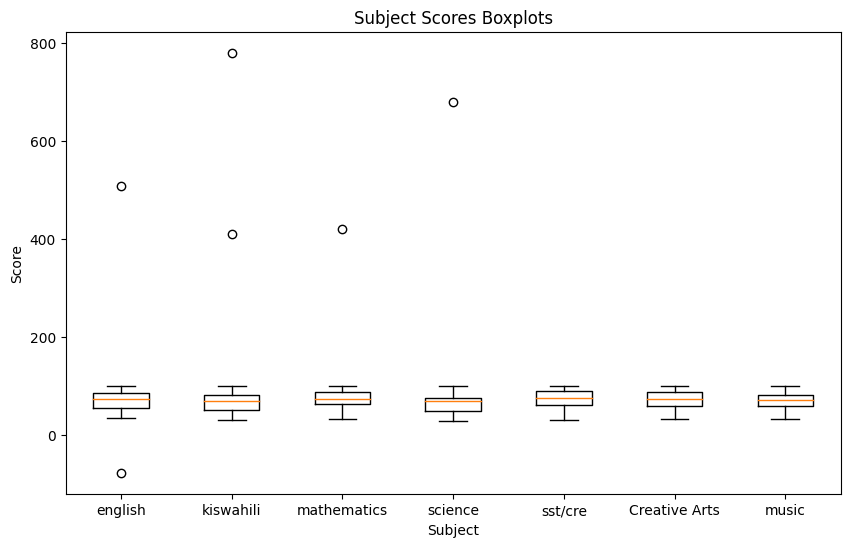

In [33]:
scores_columns = ['english', 'kiswahili', 'mathematics', 'science', 'sst/cre', 'Creative Arts', 'music']
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(df[scores_columns])
ax.set_xticks(np.arange(1, len(scores_columns) + 1))
ax.set_xticklabels(scores_columns)
ax.set_title("Subject Scores Boxplots")
ax.set_xlabel("Subject")
ax.set_ylabel("Score");

English, Kiswahili, Mathematics, and Science have outliers

In [34]:
# Getting outliers
def IQR_outliers(data, column):
    """Simple function to identify and remove outliers using IQR"""
    # get Q1 and Q2
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    # calculate IQR
    IQR = Q3-Q1
    # identify ouliers (returns True if an outlier)
    out = ((data[column]<(Q1-1.5*IQR)) | (data[column]>(Q3+1.5*IQR)))

    # identify the outlier using index
    outliers_list = list(out[out==True].index)
    # identify the actual outliers using index
    outliers = []
    for val in outliers_list:
        outliers.append(data[column][val])


    return outliers, Q1, Q3, IQR


In [35]:
# checking outliers in english column
english_outliers = IQR_outliers(df, "english")
english_outliers[0]

[-78.0, 508.0]

In [36]:
# Dealing with outliers using IQR
def IQR_remove_outliers(data, column):
    """Simple function to remove the ouliers"""
    # get values from previous function
    identify = IQR_outliers(data, column)
    Q1 = identify[1]
    Q3 = identify[2]
    IQR = identify[3]
    # remove the outliers
    df = data[~((data[column]<(Q1-1.5*IQR)) | (data[column]>(Q3+1.5*IQR)))]

    return df

In [37]:
# Removing simultaneously
for i in scores_columns:
  df = IQR_remove_outliers(df, i)

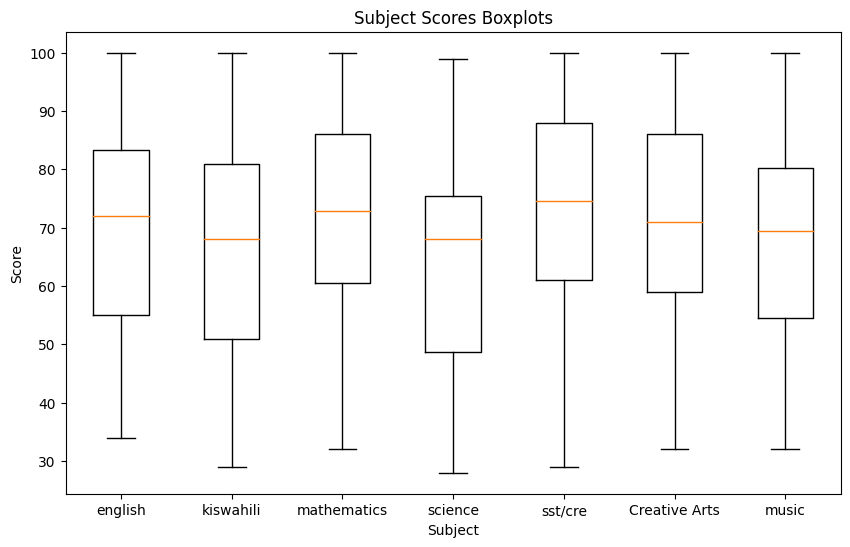

In [38]:
# Confirming using boxplots
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(df[scores_columns])
ax.set_xticks(np.arange(1, len(scores_columns) + 1))
ax.set_xticklabels(scores_columns)
ax.set_title("Subject Scores Boxplots")
ax.set_xlabel("Subject")
ax.set_ylabel("Score");

## Previewing cleaned data

In [39]:
df.head()

,names,admission number,balance,english,kiswahili,mathematics,science,sst/cre,Creative Arts,music
0,"JERIEL NDEDA, OBURA",13259,0.0,81.0,39.0,50.0,30.0,59.0,99.0,80.0
1,"MUKUHA TIMOTHY, KAMAU",13243,0.0,85.0,74.0,68.0,49.0,78.0,38.0,86.0
2,"JOB, NGARA",13307,0.0,54.0,49.0,53.0,59.0,72.0,86.0,62.0
3,"CHEGE DAVID, KAMAU",13258,0.0,71.0,97.0,92.0,41.0,81.0,77.0,80.0
4,"RAMADHAN MUSA, TEPO",13363,0.0,40.0,84.0,74.0,82.0,89.0,64.0,46.0


In [40]:
df.tail()

,names,admission number,balance,english,kiswahili,mathematics,science,sst/cre,Creative Arts,music
116,"Catherine Ndung'u, Kate",13187,0.0,84.000000,74.764706,68.000000,68.179487,48.000000,91.0,64.0
117,"Daisy Machoka, Daniel",13168,18161.0,70.958678,74.764706,72.938462,68.179487,70.833333,78.0,86.0
118,"Daniel Karanja, Wambui",13133,33619.0,78.000000,74.764706,78.000000,68.179487,29.000000,80.0,84.0
119,"Densel Esekon, Washington",nan,0.0,70.958678,74.764706,72.938462,68.179487,70.833333,46.0,78.0
144,"JOB, KAMAU",1430232,43200.0,98.000000,80.000000,86.000000,64.000000,99.000000,49.0,69.0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 0 to 144
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   names             88 non-null     object 
 1   admission number  88 non-null     object 
 2   balance           88 non-null     float64
 3   english           88 non-null     float64
 4   kiswahili         88 non-null     float64
 5   mathematics       88 non-null     float64
 6   science           88 non-null     float64
 7   sst/cre           88 non-null     float64
 8   Creative Arts     88 non-null     float64
 9   music             88 non-null     float64
dtypes: float64(8), object(2)
memory usage: 7.6+ KB


## Exploratory Data Analysis

### Univarite Analysis

In [42]:
# Adding Total Score column
df["Total Score"] = df[scores_columns].sum(axis=1)
df.head()

,names,admission number,balance,english,kiswahili,mathematics,science,sst/cre,Creative Arts,music,Total Score
0,"JERIEL NDEDA, OBURA",13259,0.0,81.0,39.0,50.0,30.0,59.0,99.0,80.0,438.0
1,"MUKUHA TIMOTHY, KAMAU",13243,0.0,85.0,74.0,68.0,49.0,78.0,38.0,86.0,478.0
2,"JOB, NGARA",13307,0.0,54.0,49.0,53.0,59.0,72.0,86.0,62.0,435.0
3,"CHEGE DAVID, KAMAU",13258,0.0,71.0,97.0,92.0,41.0,81.0,77.0,80.0,539.0
4,"RAMADHAN MUSA, TEPO",13363,0.0,40.0,84.0,74.0,82.0,89.0,64.0,46.0,479.0


In [43]:
# Top 5 students by Total Score
top_5_students = df.sort_values(by="Total Score", ascending=False).reset_index().loc[:4,["admission number","names","Total Score"]]
top_5_students

,admission number,names,Total Score
0,13232,"Barclay, Koin",615.0
1,13287,"BOSIRE EVANS, MOMANYI",577.0
2,13325,"MUIRURI, MERCY",573.0
3,13286,"CANTON, OMUSII",572.0
4,13249,"MATHEW MEJA, AWINO",561.0


In [44]:
# subject_averages = {subject: df[subject].mean() for subject in scores_columns}
# subject_averages

In [45]:
# The average score for each subject
df[scores_columns].mean()

english          69.816304
kiswahili        66.344920
mathematics      72.292657
science          62.982226
sst/cre          74.106061
Creative Arts    71.482835
music            68.454545
dtype: float64

In [46]:
df.describe()

,balance,english,kiswahili,mathematics,science,sst/cre,Creative Arts,music,Total Score
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,9878.363636,69.816304,66.344920,72.292657,62.982226,74.106061,71.482835,68.454545,485.479548
std,15513.175873,17.872700,19.688456,16.931229,19.366872,17.682747,18.537395,17.100050,46.537785
min,0.000000,34.000000,29.000000,32.000000,28.000000,29.000000,32.000000,32.000000,352.000000
25%,0.000000,55.000000,51.000000,60.500000,48.750000,61.000000,59.000000,54.500000,454.500000
50%,0.000000,72.000000,68.000000,72.938462,68.089744,74.500000,71.000000,69.500000,490.472097
75%,16136.000000,83.250000,81.000000,86.000000,75.500000,88.000000,86.000000,80.250000,512.000000
max,53963.000000,100.000000,100.000000,100.000000,99.000000,100.000000,100.000000,100.000000,615.000000


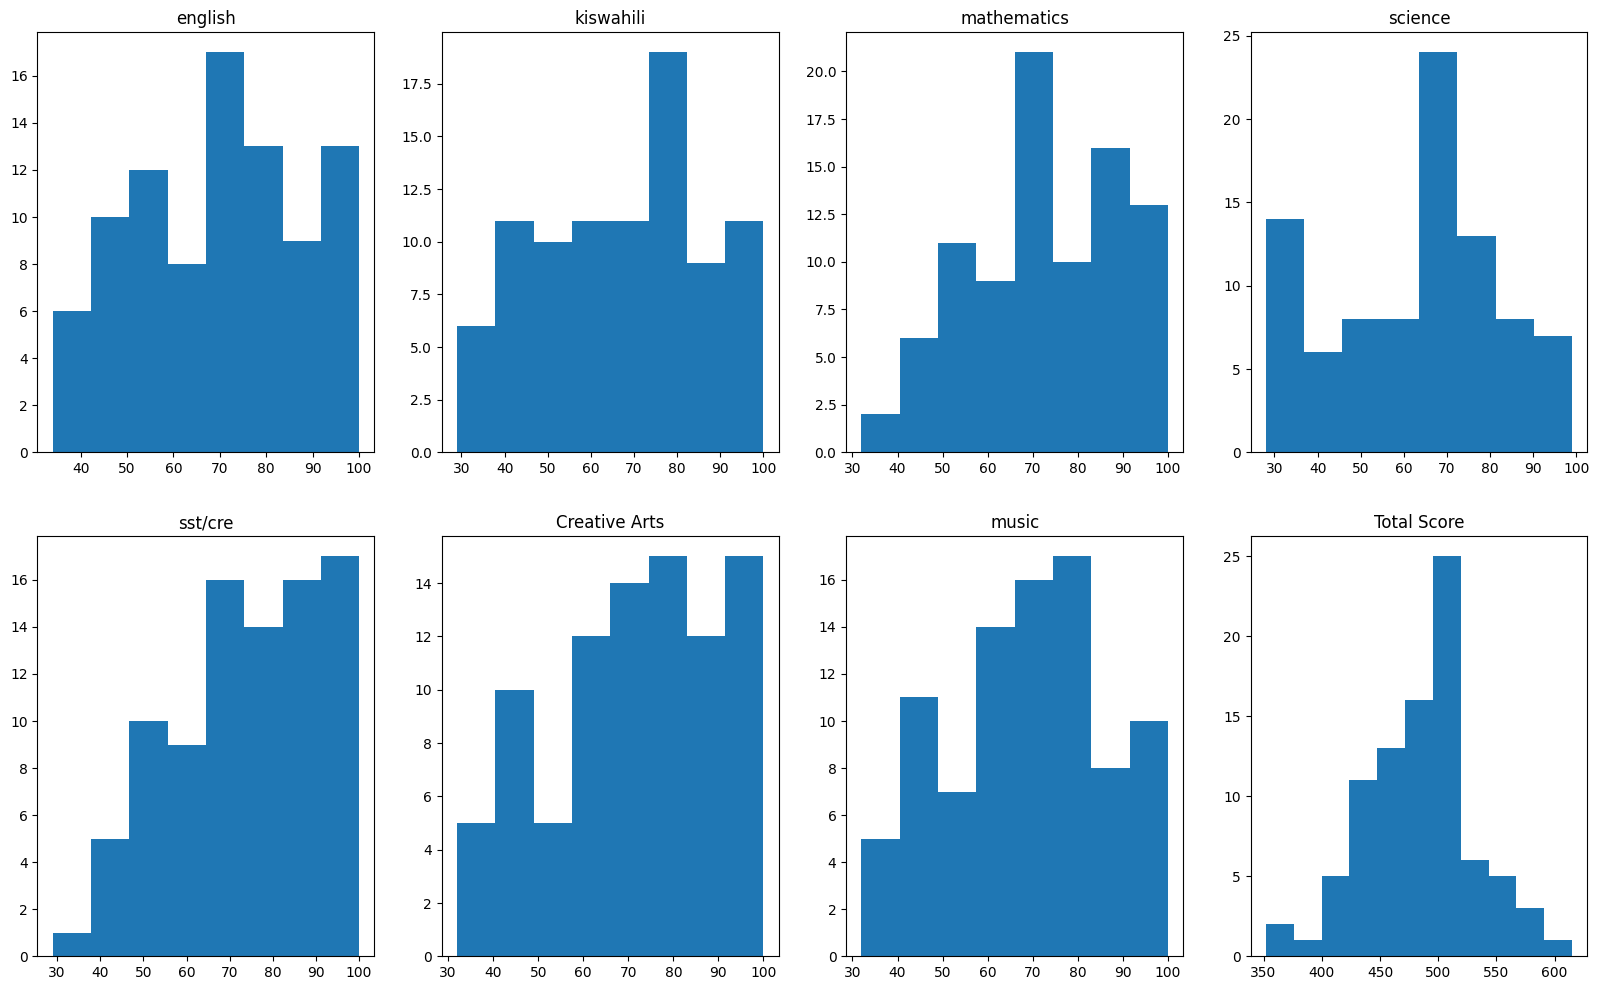

In [47]:
# Plotting Histograms
all_scores_columns = scores_columns+["Total Score"]
fig, ax = plt.subplots(nrows=2, ncols=len(all_scores_columns)//2, figsize=(20,12))
ax = ax.flatten()
for i, col in enumerate(all_scores_columns):
  ax[i].hist(df[col], bins="auto")
  ax[i].set_title(col);

The histograms show that most students in most subjects scored above average because the data has a left skew.

### Bivariate Analysis

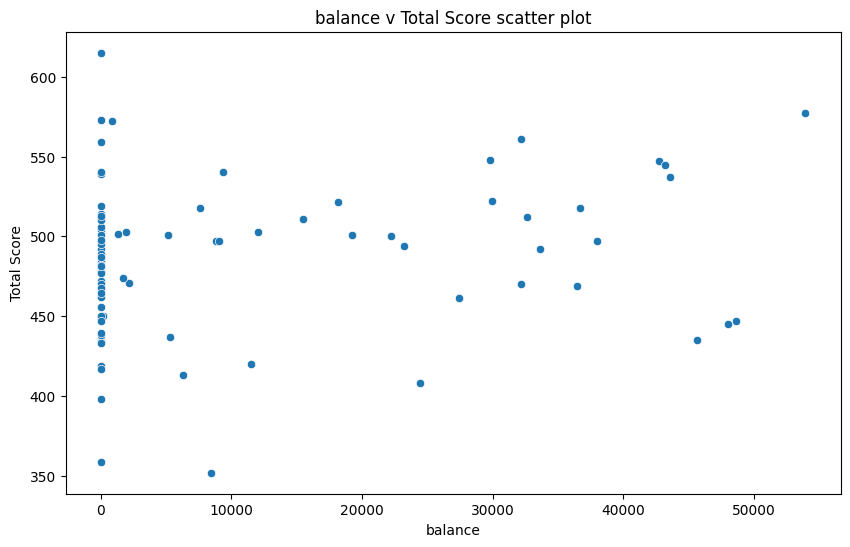

In [48]:
# balance v Total Score scatter plot
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x = df["balance"],y = df["Total Score"])
plt.title("balance v Total Score scatter plot")
plt.xlabel("balance")
plt.ylabel("Total Score");

In [49]:
np.corrcoef(df["balance"],df["Total Score"])[1,0]

0.18048604699306847

There is no linear relationship between balance and Total score